# Temperature Calibration

In July 2019 (on the field) and October 2019 (in lab), temperature was measured in 0°C water, to assess the accuracy and drift of the two temperature sensors included in CTD DCX-22 sensor: TOB1 and T (respectively ±0.5°C and ±0.1°C accuracy guaranteed by Keller)

In [1]:
using NBInclude
@nbinclude("helper-functions.ipynb");
using PyPlot

## A function to read temperature only from selected CSV files

In [2]:
#A special function to read temperature in calibration files (because the read_Keller_DCX22_CTD does 
#now takes into account the calibration shift and cannot be used here) 

function read_temperature(filename;
                     temphead="TOB1",
                     temphead2="T",
                     skipstart=8,
                     )
    d,h = readdlm(filename, ';', skipstart=skipstart, header=true)
    h = h[:] # h is a 1x2 matrix, change to a vector

    out = Dict{Symbol,Any}()
    # find date-time rows
    id, it = findfirst(h.=="Date"), findfirst(h.=="Time")
    # time 12.08.2016 13:36:58
    fmtd, fmtt = "d/m/y", "H:M:S"
    out[:t] = [Date(dd, fmtd) + Time(tt, fmtt) for (dd,tt) in zip(d[:,id], d[:,it])]

    for (head, key) in [(temphead, :temp),
                       (temphead2, :temp2)]
        i = findfirst(h.==head) # see if there is one
        tmp = Float64[]
        if i!=nothing
            out[key] = [s=="" ? missing :
                        s isa AbstractString ? parse(Float64, replace(s, ","=>".")) : Float64(s) for s in d[:,i]]
        end
    end
    # check lengths and remove all "missing"
    l = length(out[:t])
    topurge = []
    for v in values(out)
        @assert length(v)==l
        append!(topurge, findall(v.===missing))
    end
    topurge = sort(unique(topurge))
    for (k,v) in out
        deleteat!(v, topurge)
        if k!=:t
            out[k] = Float64.(v) # make the vector an
        end
    end
    return out
end

read_temperature (generic function with 1 method)

# Calibrations realized on lab 

Temperature calibration was made in a **0°C isotherm bath (ice and water)**, stored in the cold room at 1°C during half a day. Sensors had no contact with the walls, and were maintained vertically in the the isotherm cylinder.

The water was not initially at 0°C, that is why the system takes time to reach the 0°C equilibrium. 

## CTD 205144

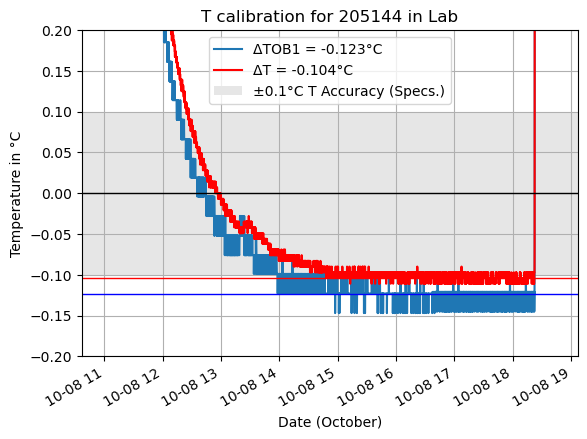

In [3]:
pygui(false)
d = read_temperature(path_CTD*"2019-10-08/205144-10mH2O_08_10_2019-11_00_00.csv")
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = -0.123°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = -0.104°C") 
ylim(-0.2,0.2)
ylabel("Temperature in °C")
xlabel("Date (October)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 205144 in Lab")
axhline(y=-0.123,linewidth=1,color="b")
axhline(y=-0.104,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"205144_lab.png")


## CTD 205145

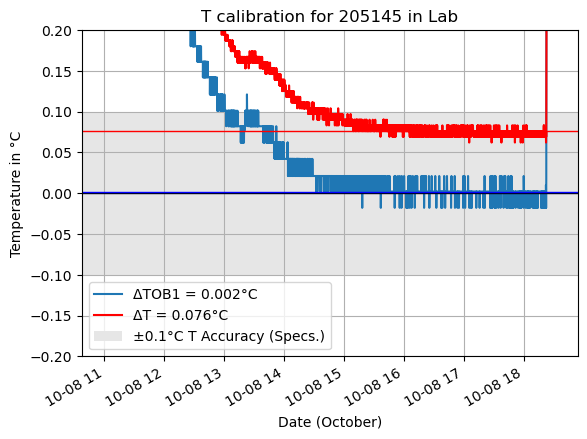

In [4]:
pygui(false)
d = read_temperature(path_CTD*"2019-10-08/205145-10mH2O_08_10_2019-11_00_00.csv");
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = 0.002°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = 0.076°C") 
ylim(-0.2,0.2)
ylabel("Temperature in °C")
xlabel("Date (October)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 205145 in Lab")
axhline(y=0.002,linewidth=1,color="b")
axhline(y=0.0760,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"205145_lab.png")


##  CTD 205309

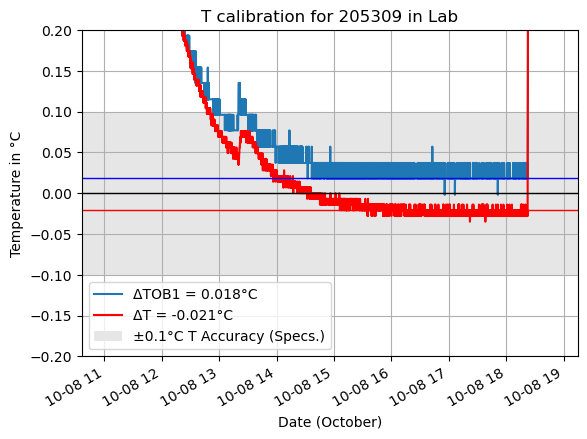

In [5]:
pygui(false)
d = read_temperature(path_CTD*"2019-10-08/205309-100mH2O_08_10_2019-11_00_00.csv");
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = 0.018°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = -0.021°C") 
ylim(-0.2,0.2)
ylabel("Temperature in °C")
xlabel("Date (October)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 205309 in Lab")
axhline(y=0.018,linewidth=1,color="b")
axhline(y=-0.021,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"205309_lab.png")



## CTD 207265 

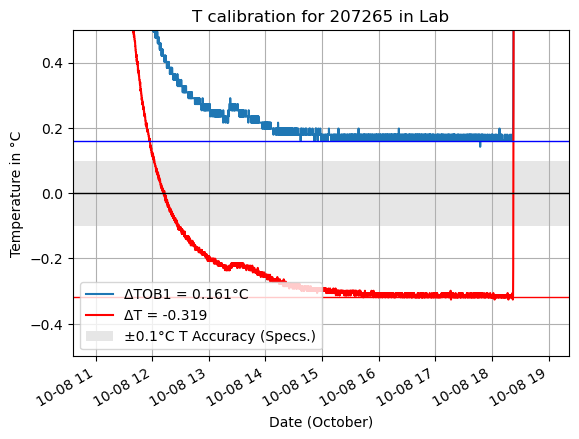

In [6]:
pygui(false)
d = read_temperature(path_CTD*"2019-10-08/207265-300mH2O_08_10_2019-11_00_00.csv");
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = 0.161°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = -0.319") 
ylim(-0.5,0.5)
ylabel("Temperature in °C")
xlabel("Date (October)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 207265 in Lab")
axhline(y=0.161,linewidth=1,color="b")
axhline(y=-0.319,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
grid(true)
legend(loc="lower left")
savefig(path_results_cali_temp*"207265_lab.png")

# Calibration realized on the field


The sensors were put a on simple plastic closed box (~50L) with water from stream and ice. A blanket and sleeping matress were rolled over to isolate as much as possible the box from the sun rays. 

On the field we can see that the sensor reach the 0°C equilibrium much faster than on the lab. That is because the water on the field (coming from melt runoff) was already at 0°C. However, the calibration quality was less good than in the lab. We show the results for indication only. 

## CTD 205144

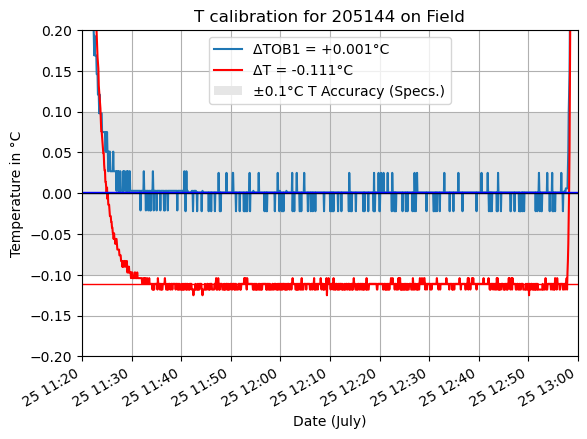

In [7]:
pygui(false)
d = read_temperature(path_CTD*"2019-07-25/205144-10mH2O_24_07_2019-15_41_14.csv")
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = +0.001°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = -0.111°C") 
ylim(-0.2,0.2)
xlim(DateTime(2019,7,25,11,20),DateTime(2019,7,25,13))
ylabel("Temperature in °C")
xlabel("Date (July)")

axhline(y=0,linewidth=1,color="black")
title("T calibration for 205144 on Field")
axhline(y=0.001,linewidth=1,color="b")
axhline(y=-0.111,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"205144_field.png")

##  CTD 205145

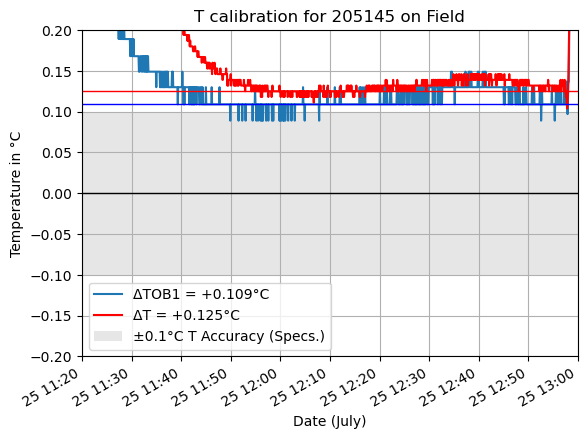

In [8]:
pygui(false)
d = read_temperature(path_CTD*"2019-07-25/205145-10mH2O_24_07_2019-16_15_00.csv")
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = +0.109°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = +0.125°C") 
ylim(-0.2,0.2)
xlim(DateTime(2019,7,25,11,20),DateTime(2019,7,25,13))
ylabel("Temperature in °C")
xlabel("Date (July)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 205145 on Field")
axhline(y=0.109,linewidth=1,color="b")
axhline(y=0.125,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"205145_field.png")

## CTD 205309

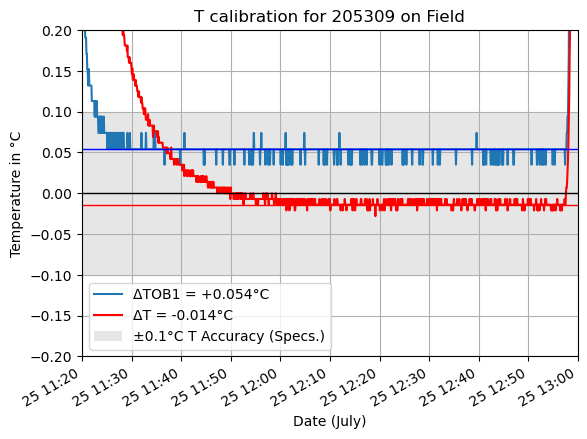

In [9]:
pygui(false)
d = read_temperature(path_CTD*"2019-07-25/205309-100mH2O_24_07_2019-13_00_00.csv")
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = +0.054°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = -0.014°C") 
ylim(-0.2,0.2)
xlim(DateTime(2019,7,25,11,20),DateTime(2019,7,25,13))
ylabel("Temperature in °C")
xlabel("Date (July)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 205309 on Field")
axhline(y=0.054,linewidth=1,color="b")
axhline(y=-0.014,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"205309_field.png")

## CTD 207265

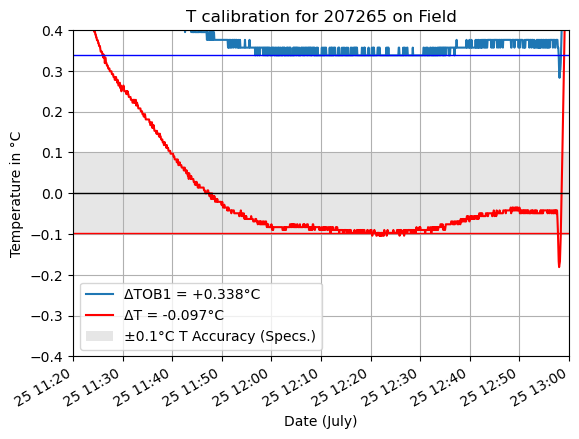

In [10]:
pygui(false)
d = read_temperature(path_CTD*"2019-07-25/207265-300mH2O_24_07_2019-13_45_00.csv")
fig=figure()
plot(d[:t], d[:temp],linestyle="-",marker="None",label="ΔTOB1 = +0.338°C")
fig[:autofmt_xdate](bottom=0.2,rotation=30,ha="right")
plot(d[:t], d[:temp2],linestyle="-",color="red",marker="None",label="ΔT = -0.097°C") 
ylim(-0.4,0.4)
xlim(DateTime(2019,7,25,11,20),DateTime(2019,7,25,13))
ylabel("Temperature in °C")
xlabel("Date (July)")
axhline(y=0,linewidth=1,color="black")
title("T calibration for 207265 on Field")
axhline(y=0.338,linewidth=1,color="b")
axhline(y=-0.097,linewidth=1,color="r")
axhspan(-0.1, 0.1 , facecolor = "0.9" , label="±0.1°C T Accuracy (Specs.)")
legend()
grid(true)
savefig(path_results_cali_temp*"207265_field.png")

# Other calibration in Laboratory from Annegrit Phole - 23 June 2020

Annegrit conducted a new calibration in June 2020. We recall the calibration of this study for comparison (8 October 2019). Her results are slighty different, but is in line with our estimated temperature uncertainties for T, that is 0.05°C. 

CTD number | Sensor | 8 October 2019 | 23 June 2020

207265     | TOB1   | 0.152          | 0.161    

207265     | T      | -0.319         | -0.351  

205309     | TOB1   | 0.018          | -0.031  

205309     | T      | -0.021         | -0.049  

205145     | TOB1   | 0.002          | 0.026

205145     | T      | 0.076          | 0.010 